In [98]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [99]:
data = pd.read_csv('travel-times.csv')

In [100]:
data.isnull().sum()

Date                0
StartTime           0
DayOfWeek           0
GoingTo             0
Distance            0
MaxSpeed            0
AvgSpeed            0
AvgMovingSpeed      0
FuelEconomy        17
TotalTime           0
MovingTime          0
Take407All          0
Comments          181
dtype: int64

In [101]:
data = data.dropna(axis=0, how='any')
(data.shape)

(23, 13)

In [102]:
data.head()

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All,Comments
15,12/19/2011,07:34,Monday,GSK,52.00,137.8,76.5,87.8,8.89,40.8,35.5,No,Put snow tires on
49,11/21/2011,07:24,Monday,GSK,52.25,127.3,38.1,50.3,10.05,82.3,62.4,No,Huge traffic backup
50,11/17/2011,16:16,Thursday,Home,51.16,127.6,72.4,77.4,10.05,42.4,39.6,No,Pumped tires up: check fuel economy improved?
52,11/16/2011,16:13,Wednesday,Home,51.12,125.1,65.0,73.1,9.53,47.2,41.9,No,Backed up at Bronte
54,11/15/2011,17:36,Tuesday,Home,51.06,122.8,61.4,70.9,9.53,49.9,43.2,No,Backed up at Bronte


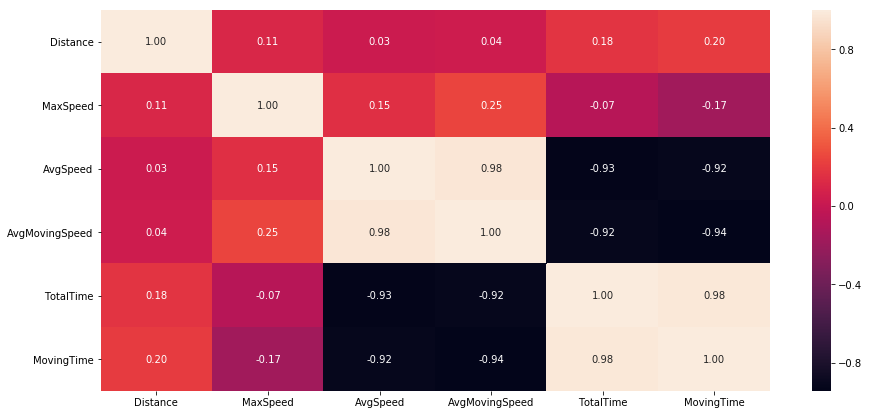

In [103]:
#Построим корреляционную матрицу
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

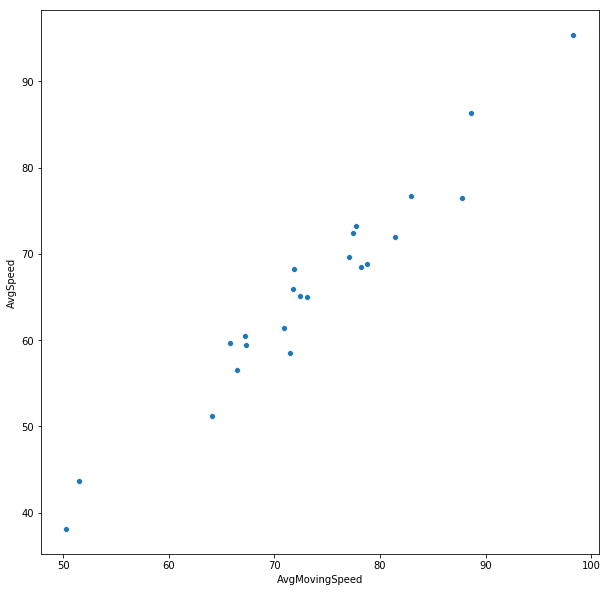

In [104]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='AvgMovingSpeed', y='AvgSpeed', data=data)

In [105]:
train, test = train_test_split(data)


In [106]:
train.head()

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All,Comments
166,8/12/2011,08:05,Friday,GSK,49.02,128.4,76.7,82.9,8.54,38.4,35.5,No,Must be Friday
133,9/6/2011,16:27,Tuesday,Home,52.88,131.6,95.4,98.3,8.5,33.3,32.3,Yes,Took 407 all the way (to McMaster)
182,8/2/2011,07:38,Tuesday,GSK,53.48,124.9,68.8,78.8,8.48,46.7,40.7,No,Turn around on Derry
187,7/27/2011,17:24,Wednesday,Home,50.98,124.9,68.3,71.9,8.45,44.8,42.6,No,Police slowdown on 403
54,11/15/2011,17:36,Tuesday,Home,51.06,122.8,61.4,70.9,9.53,49.9,43.2,No,Backed up at Bronte


In [107]:
test = test.drop(['AvgSpeed'],axis=1)
test.head()

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All,Comments
158,8/18/2011,08:11,Thursday,GSK,52.26,137.7,64.1,8.37,61.2,48.9,No,Accident at 403/highway 6; detour along Dundas
15,12/19/2011,07:34,Monday,GSK,52.00,137.8,87.8,8.89,40.8,35.5,No,Put snow tires on
150,8/24/2011,07:59,Wednesday,GSK,49.07,127.1,71.5,8.54,50.3,41.1,No,Heavy volume on Derry
184,7/29/2011,08:22,Friday,GSK,49.07,121.1,77.7,8.45,40.2,37.9,No,Empty roads
132,9/7/2011,07:57,Wednesday,GSK,49.08,125.1,66.5,8.5,52.1,44.3,No,Back to school traffic?


In [115]:
#Регрессия
KNeighborsRegressorObj = KNeighborsRegressor(n_neighbors=5)
KNeighborsRegressorObj

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [116]:
KNeighborsRegressorObj.fit(train[['AvgMovingSpeed','TotalTime']], train['AvgSpeed'])
KNeighborsRegressorObj.predict(test[['AvgMovingSpeed','TotalTime']])

array([61.24, 75.24, 63.38, 71.64, 61.24, 70.22])